In [ ]:
!pip install networkx


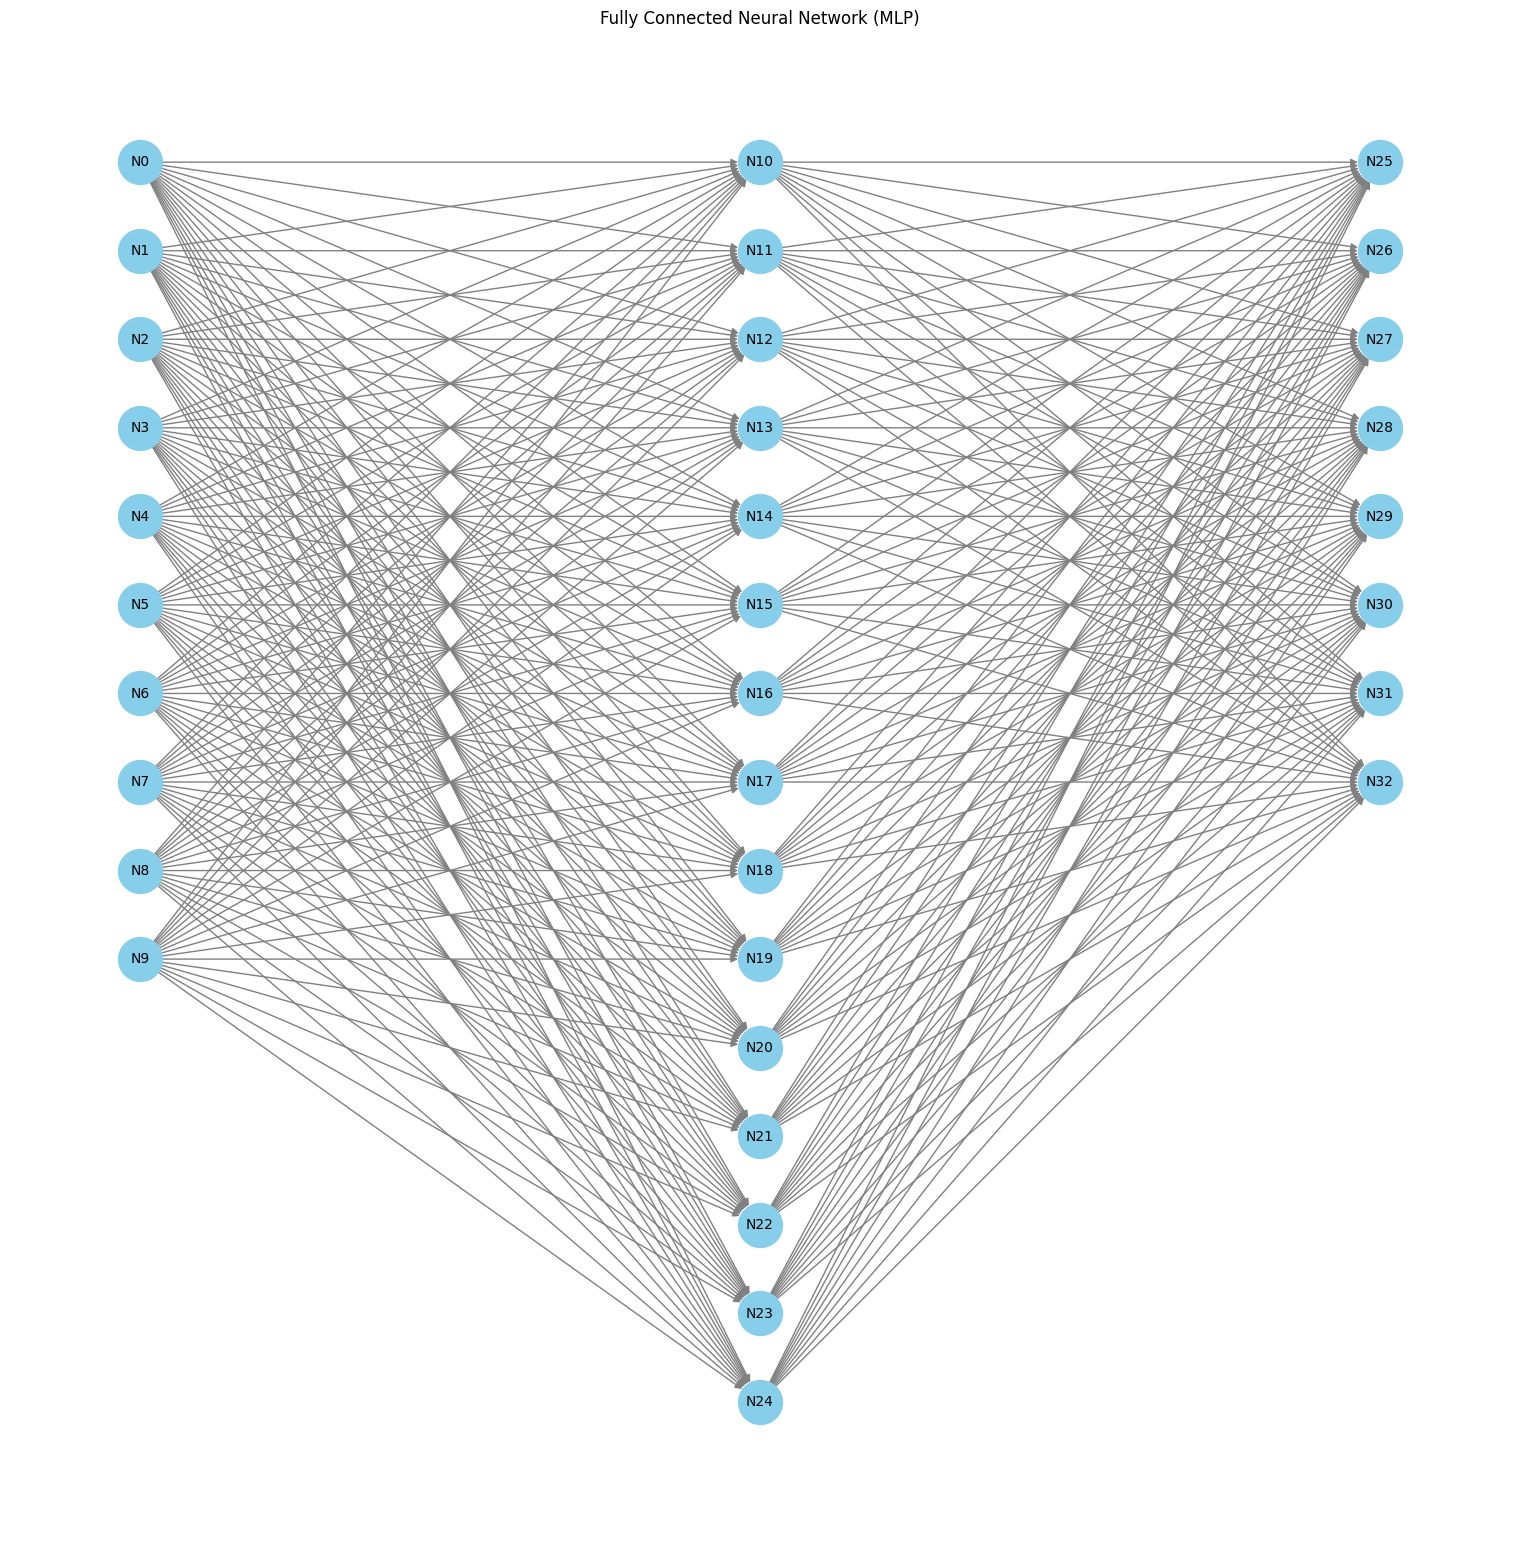

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_fcnn():
    layers = [10, 15, 8]  # Example: 3 input neurons, 4 hidden neurons, 2 output neurons
    G = nx.DiGraph()
    pos = {}
    node_labels = {}

    y_offset = 5
    x_offset = 8
    node_count = 0

    # Assign positions and labels
    for layer_idx, num_nodes in enumerate(layers):
        for i in range(num_nodes):
            node_id = node_count
            pos[node_id] = (layer_idx * x_offset, -i * y_offset)
            node_labels[node_id] = f'N{node_id}'
            G.add_node(node_id)
            node_count += 1

    # Create edges (fully connected network)
    start_idx = 0
    for layer_idx in range(len(layers) - 1):
        end_idx = start_idx + layers[layer_idx]
        next_end_idx = end_idx + layers[layer_idx + 1]
        for src in range(start_idx, end_idx):
            for dst in range(end_idx, next_end_idx):
                G.add_edge(src, dst)
        start_idx = end_idx

    # Draw network
    plt.figure(figsize=(15,15))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color='skyblue', font_size=10, edge_color='gray')
    plt.title("Fully Connected Neural Network (MLP)")
    plt.show()

draw_fcnn()


input = 10 , hidden 15 , output 8

In [ ]:
!pip install networkx tensorflow matplotlib


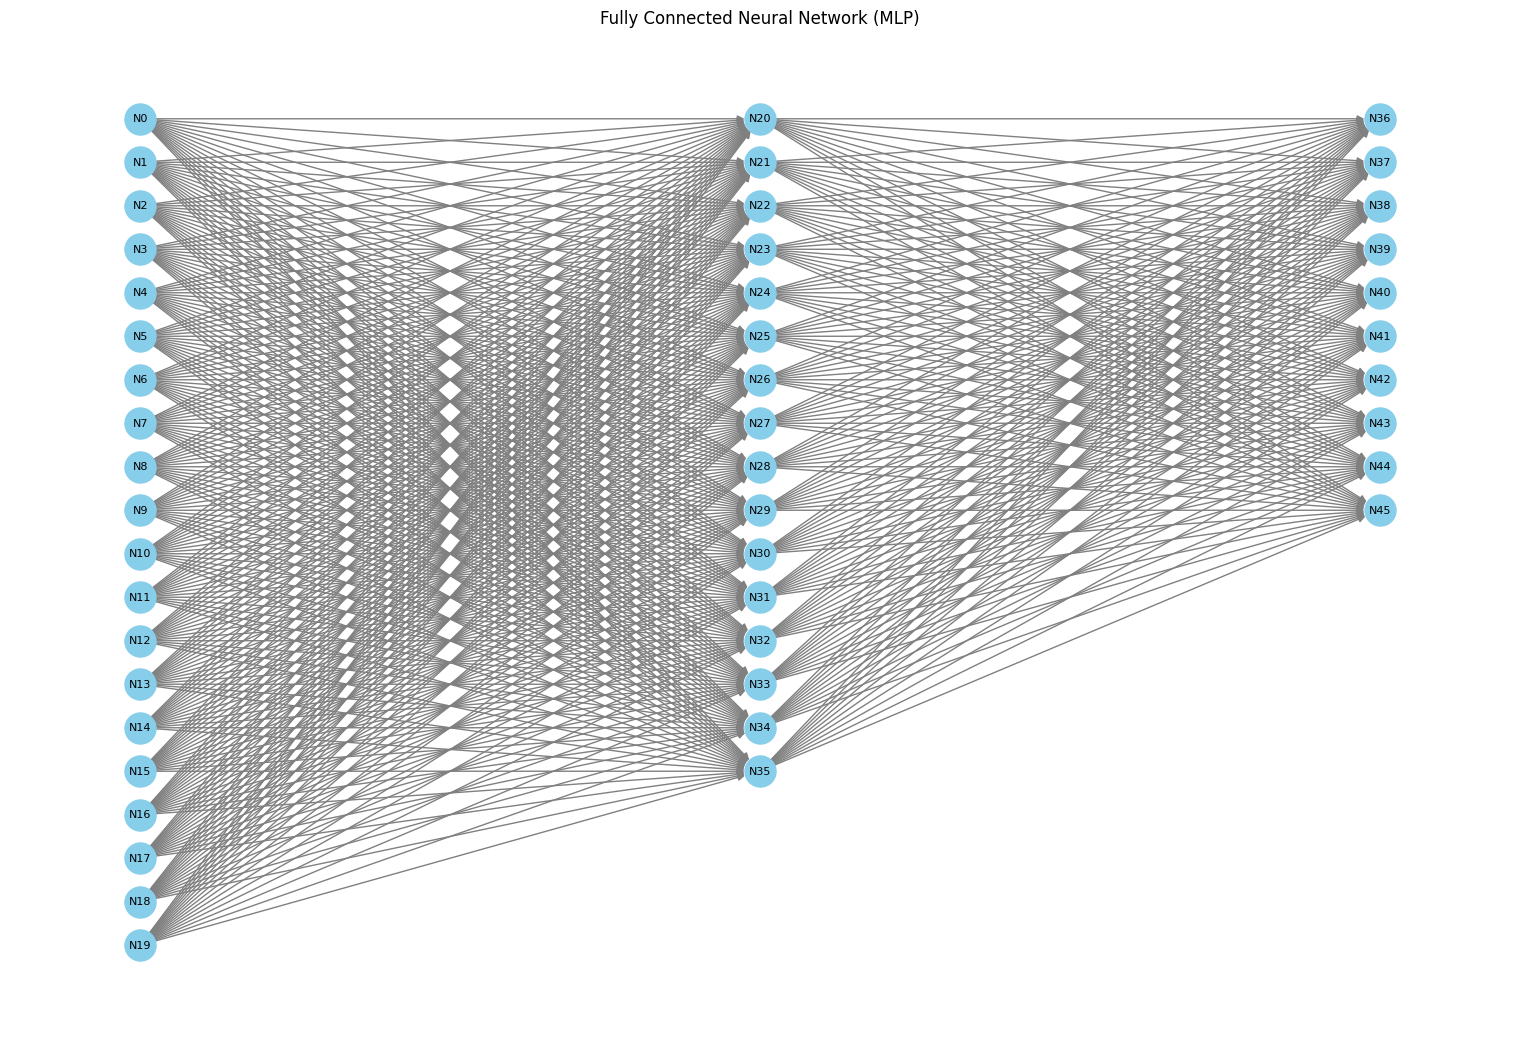

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


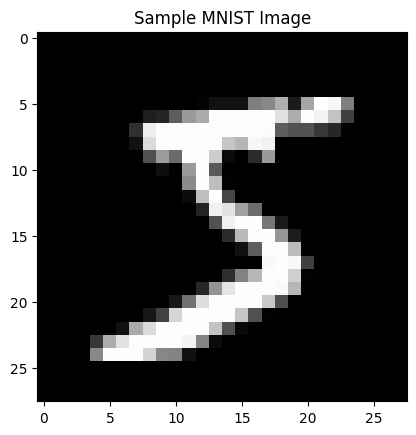

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Neural Network Output Probabilities: [[0.08233317 0.12168714 0.07493553 0.07436182 0.10215551 0.05823888
  0.13891105 0.1300336  0.05504644 0.16229683]]


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

def draw_fcnn():
    layers = [784, 16, 10]  # Example: 784 input neurons (28x28 image), 16 hidden neurons, 10 output neurons
    G = nx.DiGraph()
    pos = {}
    node_labels = {}

    y_offset = 2
    x_offset = 3
    node_count = 0

    # Assign positions and labels
    for layer_idx, num_nodes in enumerate(layers):
        for i in range(min(num_nodes, 20)):  # Display only up to 20 neurons per layer for clarity
            node_id = node_count
            pos[node_id] = (layer_idx * x_offset, -i * y_offset)
            node_labels[node_id] = f'N{node_id}'
            G.add_node(node_id)
            node_count += 1

    # Create edges (fully connected network)
    start_idx = 0
    for layer_idx in range(len(layers) - 1):
        end_idx = start_idx + min(layers[layer_idx], 20)
        next_end_idx = end_idx + min(layers[layer_idx + 1], 20)
        for src in range(start_idx, end_idx):
            for dst in range(end_idx, next_end_idx):
                G.add_edge(src, dst)
        start_idx = end_idx

    # Draw network
    plt.figure(figsize=(15, 10))
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color='skyblue', font_size=8, edge_color='gray')
    plt.title("Fully Connected Neural Network (MLP)")
    plt.show()

def process_image():
    # Load MNIST dataset
    (x_train, y_train), (_, _) = mnist.load_data()
    sample_image = x_train[0]  # Select first image

    # Show the image
    plt.imshow(sample_image, cmap='gray')
    plt.title("Sample MNIST Image")
    plt.show()

    # Normalize and flatten the image
    sample_image = sample_image / 255.0  # Normalize pixel values
    sample_image = sample_image.flatten().reshape(1, 784)  # Flatten to 1D

    # Define a simple neural network
    model = Sequential([
        Dense(16, activation='relu', input_shape=(784,)),
        Dense(10, activation='softmax')
    ])

    # Forward pass through the network
    output = model.predict(sample_image)
    print("Neural Network Output Probabilities:", output)

draw_fcnn()
process_image()
